In [138]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../src')

import os
import time
from IPython.core.display import clear_output
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import lmfit
import functools


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


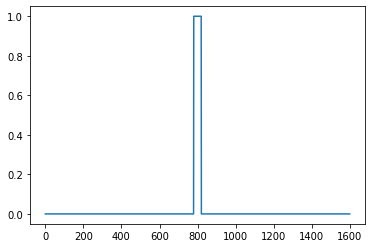

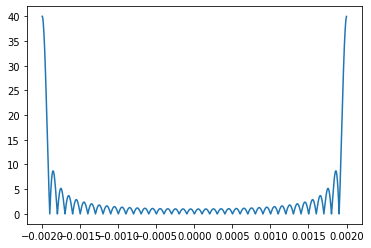

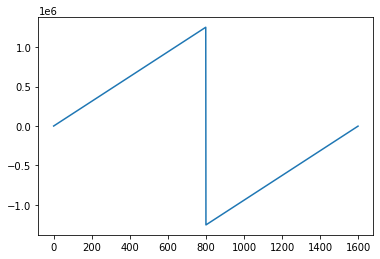

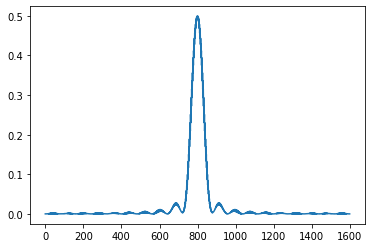

In [143]:
dim = (1600, )
cm = 1e-2
mm = 1e-3
nm = 1e-9

x = np.linspace(-2, 2, dim[0]) * mm
X = x
z = 3 * cm
d = 0.1 * mm
lam = 660 * nm
k = 2 * np.pi / lam

A = np.zeros(dim)
# rectangular aperture
A[(abs(X) < d/2)] = 1

plt.plot(A)
plt.show()

Ak = np.fft.fft(A) # kernel

plt.plot(np.abs(Ak))
plt.show()

kx = np.fft.fftfreq(len(x), np.diff(x)[0]) * 2 * np.pi

plt.plot(kx)
plt.show()

H = np.exp(1j * z * np.sqrt(k**2 - kx**2))

E = np.fft.ifft(Ak * H)

plt.plot(np.abs(E)**2)
plt.show()

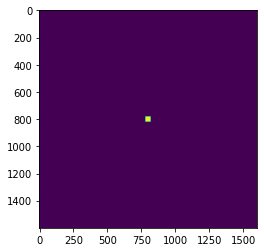

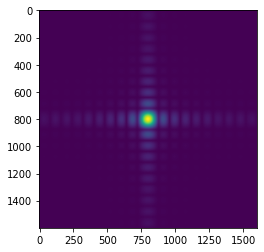

In [8]:
dim = (1600, 1600)
cm = 1e-2
mm = 1e-3
nm = 1e-9

x = np.linspace(-2, 2, dim[0]) * mm
y = np.linspace(-2, 2, dim[0]) * mm
X, Y = np.meshgrid(x, y) 
z = 3 * cm
d = 0.1 * mm
lam = 660 * nm
k = 2 * np.pi / lam

A = np.zeros(dim)
A[(abs(X) < d/2) & (abs(Y) < d/2)] = 1

plt.imshow(A)
plt.show()

Ak = np.fft.fft2(A) # kernel

kx = np.fft.fftfreq(len(x), np.diff(x)[0]) * 2 * np.pi
ky = np.fft.fftfreq(len(y), np.diff(y)[0]) * 2 * np.pi
KX, KY = np.meshgrid(kx, ky)

H = np.exp(1j * z * np.sqrt(k**2 - np.abs(KX)**2 - np.abs(KY)**2))
E = np.fft.ifft2(Ak * H)

plt.imshow(np.abs(E))
plt.show()


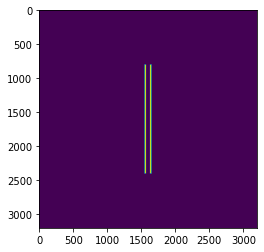

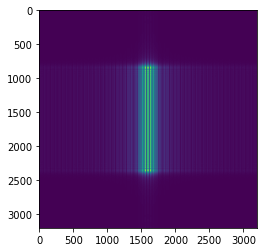

In [13]:
dim = (3200, 3200)
cm = 1e-2
mm = 1e-3
nm = 1e-9

x = np.linspace(-4, 4, dim[0]) * mm
y = np.linspace(-4, 4, dim[0]) * mm
X, Y = np.meshgrid(x, y) 
z = 3 * cm
S = 0.2 * mm
D = 0.05 * mm
lam = 660 * nm
k = 2 * np.pi / lam

A = np.zeros(dim)
A[((abs(X - S/2) < D/2) | (abs(X + S/2) < D/2)) & (abs(Y) < 2 * mm)] = 1

plt.imshow(A)
plt.show()

Ak = np.fft.fft2(A) # kernel

kx = np.fft.fftfreq(len(x), np.diff(x)[0]) * 2 * np.pi
ky = np.fft.fftfreq(len(y), np.diff(y)[0]) * 2 * np.pi
KX, KY = np.meshgrid(kx, ky)

H = np.exp(1j * z * np.sqrt(k**2 - np.abs(KX)**2 - np.abs(KY)**2))
E = np.fft.ifft2(Ak * H)

plt.imshow(np.abs(E))
plt.show()


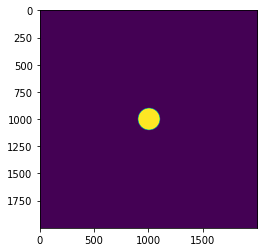

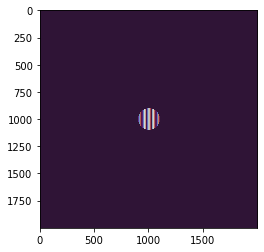

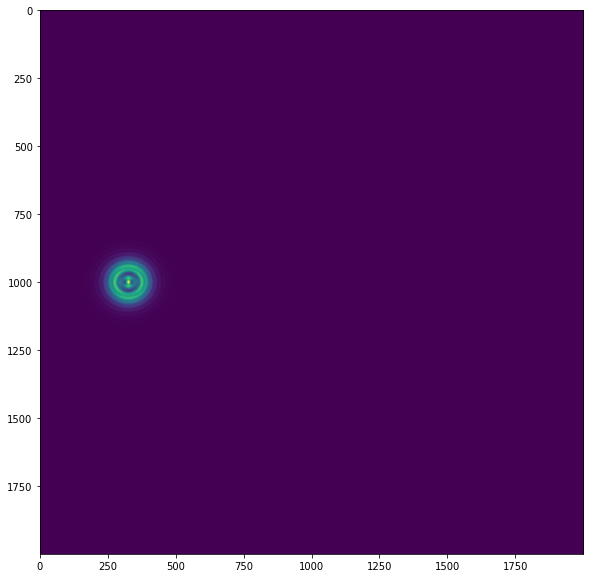

In [174]:
dim = (2000, 2000)
cm = 1e-2
mm = 1e-3
um = 1e-6
nm = 1e-9

r = 500 * um # aperture radius
z = 1 * mm # image z-position
lam = 660 * nm # wavelength
f = 1 * z # focal length

D = 0.1 * r


x = np.linspace(-r, r, dim[0])
y = np.linspace(-r, r, dim[1])
X, Y = np.meshgrid(x, y) 
k = 2 * np.pi / lam # wave number

# phase = k * (np.sqrt(X**2 + Y**2 + f**2) - f)
phase = k * X
# phase = np.ones_like(X)
A = np.exp(1j * phase)
A[(X**2 + Y**2) > D**2] = 0

# plt.figure(figsize=(10, 10))
plt.imshow(np.abs(A))
plt.show()

# plt.figure(figsize=(10, 10))
plt.imshow(np.angle(A), cmap='twilight', interpolation='nearest')
plt.show()

Ak = np.fft.fft2(A) # kernel

kx = np.fft.fftfreq(len(x), np.diff(x)[0]) * 2 * np.pi
ky = np.fft.fftfreq(len(y), np.diff(y)[0]) * 2 * np.pi
KX, KY = np.meshgrid(kx, ky)

H = np.exp(1j * z * np.emath.sqrt(k**2 - np.abs(KX)**2 - np.abs(KY)**2))
E = np.fft.ifft2(Ak * H)

plt.figure(figsize=(10, 10))
plt.imshow(np.abs(E)**2,  interpolation='nearest')
plt.show()

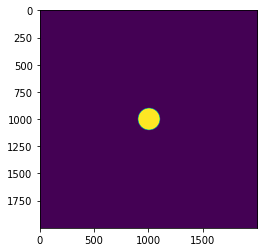

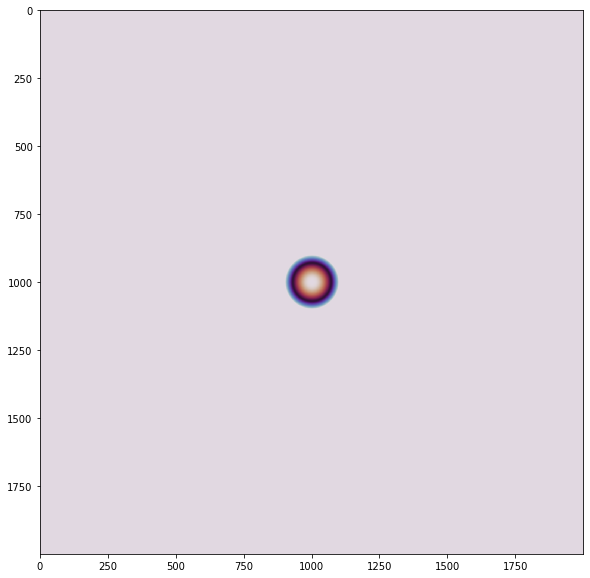

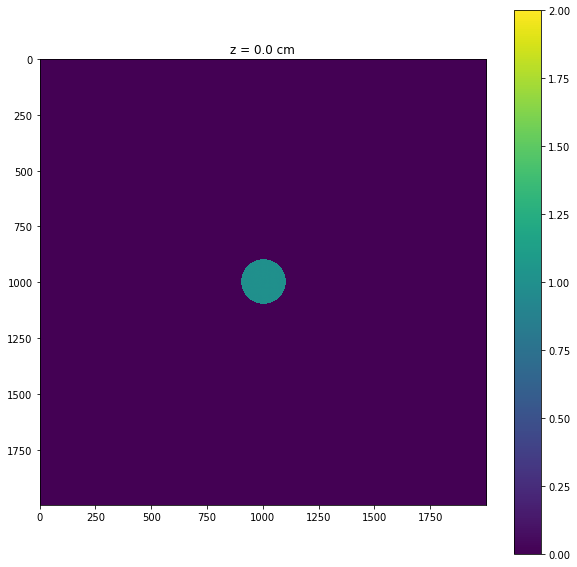

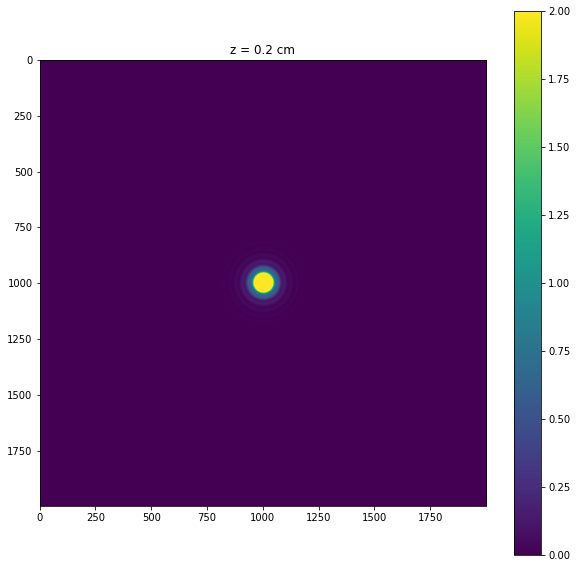

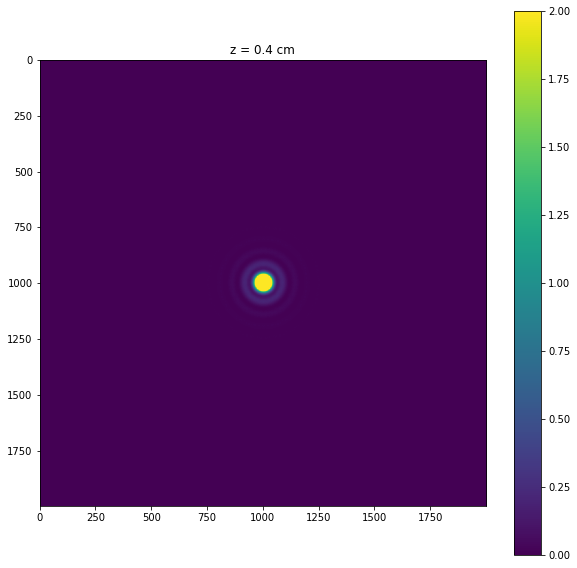

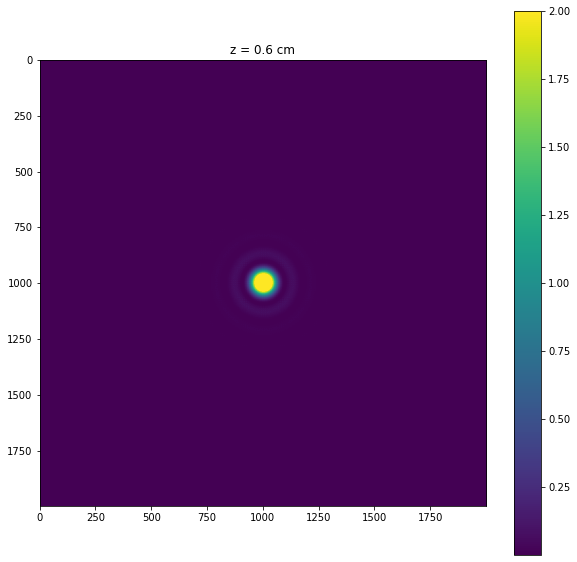

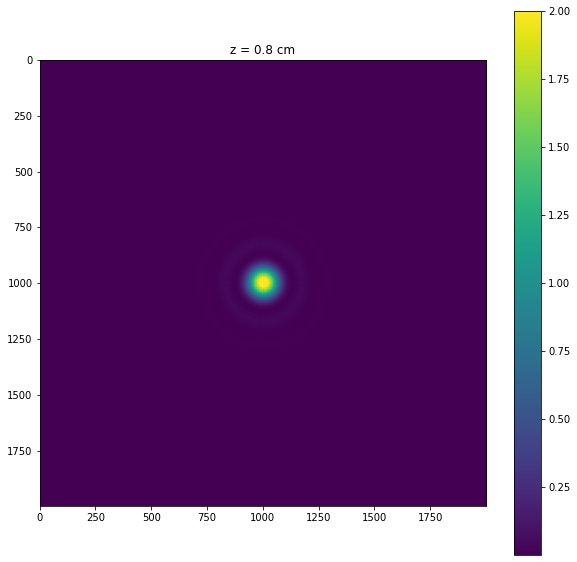

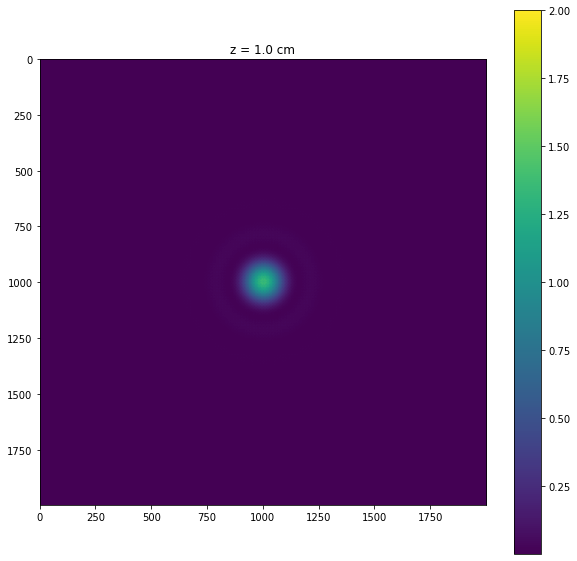

In [184]:
dim = (2000, 2000)
cm = 1e-2
mm = 1e-3
um = 1e-6
nm = 1e-9

# r = 500 * mm # aperture radius
# # z = 1 * mm # image z-position
# lam = 660 * nm # wavelength
# f = 100 * cm # focal length

# D = 0.2 * r

r = 500 * um # aperture radius
# z = 1 * mm # image z-position
lam = 660 * nm # wavelength
f = 0.6 * cm # focal length

D = 0.1 * r


x = np.linspace(-r, r, dim[0])
y = np.linspace(-r, r, dim[1])
X, Y = np.meshgrid(x, y) 
k = 2 * np.pi / lam # wave number

phase = -k * (np.sqrt(X**2 + Y**2 + f**2) - f)
# phase = k * X
# phase = np.ones(dim)
# gaussian = np.exp(-((X**2 + Y**2) / (2 * D**2)))
gaussian = 1
A = gaussian * np.exp(1j * phase)
A[(X**2 + Y**2) > D**2] = 0

# plt.figure(figsize=(10, 10))
plt.imshow(np.abs(A))
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(np.angle(A), cmap='twilight', interpolation='nearest')
plt.show()

Ak = np.fft.fft2(A) # kernel

kx = np.fft.fftfreq(len(x), np.diff(x)[0]) * 2 * np.pi
ky = np.fft.fftfreq(len(y), np.diff(y)[0]) * 2 * np.pi
KX, KY = np.meshgrid(kx, ky)

for z in np.linspace(0, 1 * cm, 5 + 1):
    H = np.exp(1j * z * np.emath.sqrt(k**2 - np.abs(KX)**2 - np.abs(KY)**2))
    E = np.fft.ifft2(Ak * H)

    plt.figure(figsize=(10, 10))
    plt.imshow(np.abs(E)**2, vmax=2, interpolation='nearest')
    plt.colorbar()
    plt.title(f'z = {z / cm} cm')
    plt.show()


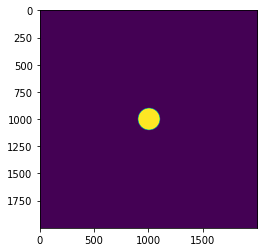

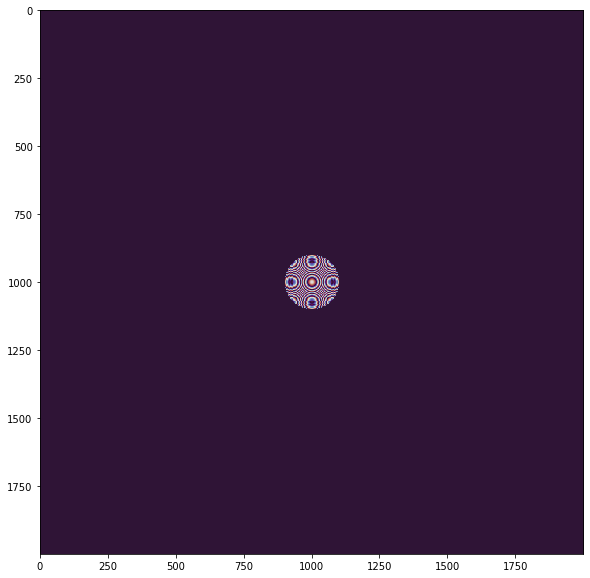

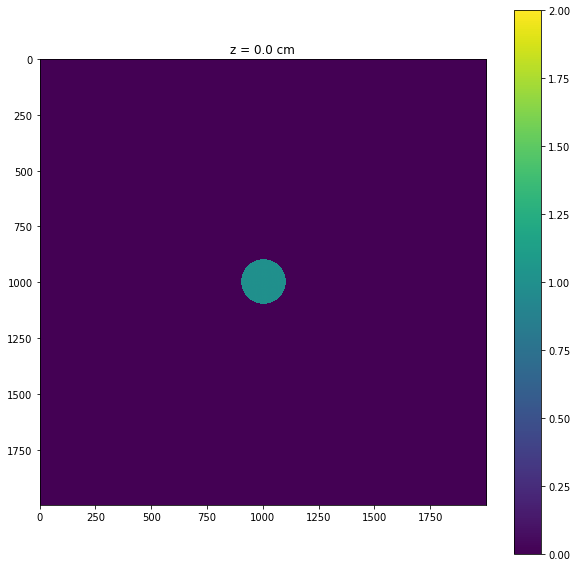

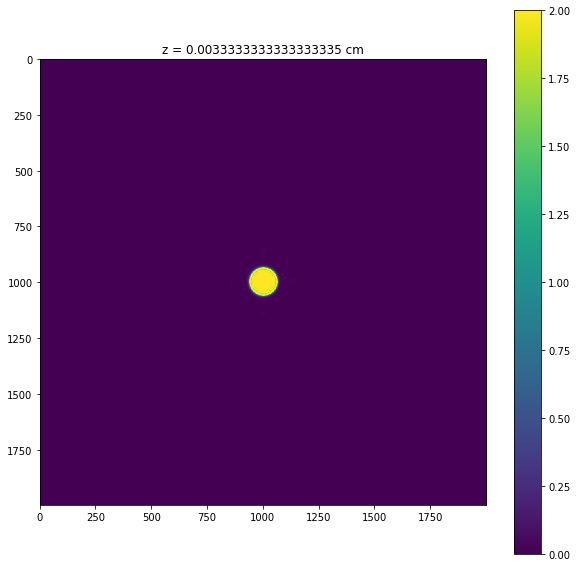

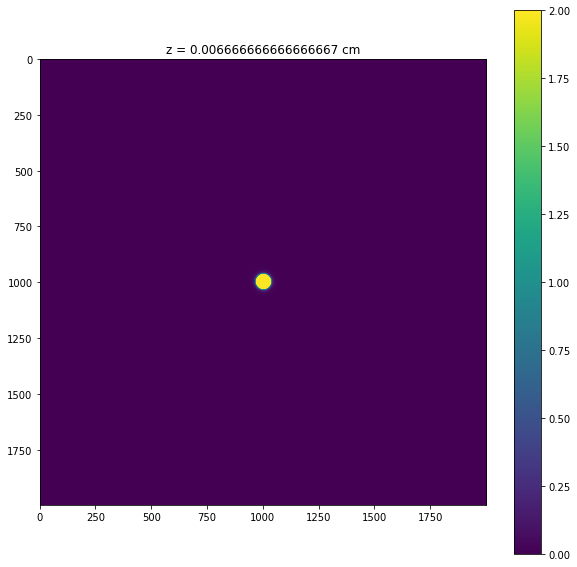

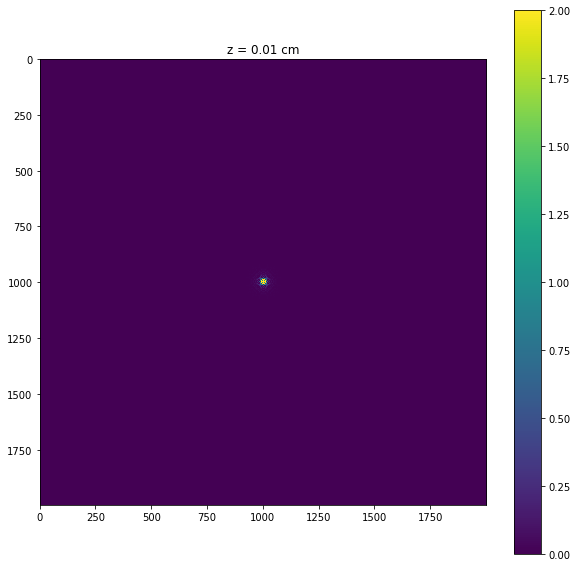

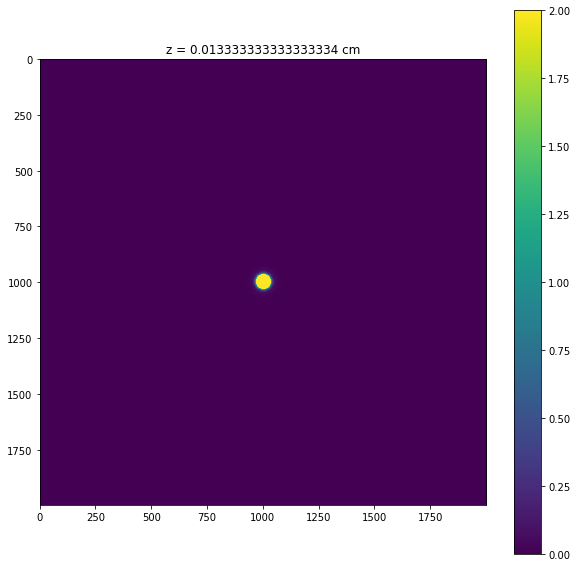

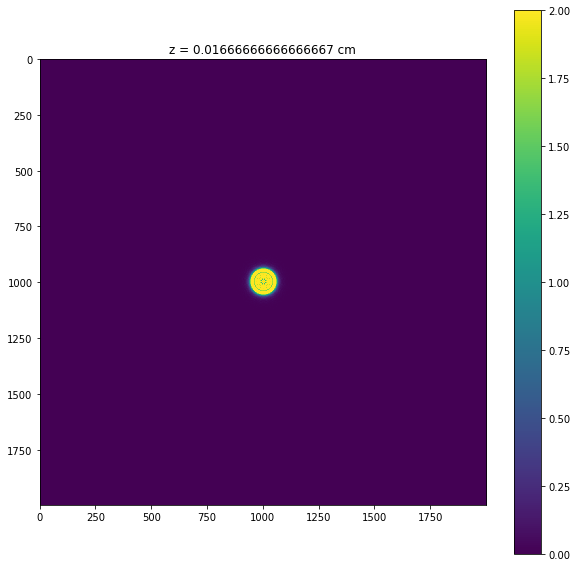

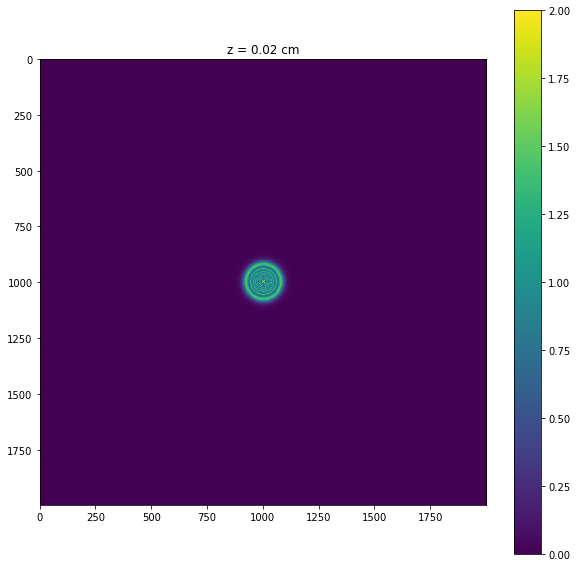

In [193]:
dim = (2000, 2000)
cm = 1e-2
mm = 1e-3
um = 1e-6
nm = 1e-9


r = 500 * um # aperture radius
lam = 660 * nm # wavelength
f = 0.1 * mm # focal length

D = 0.1 * r


x = np.linspace(-r, r, dim[0])
y = np.linspace(-r, r, dim[1])
X, Y = np.meshgrid(x, y) 
k = 2 * np.pi / lam # wave number

phase = -k * np.sqrt(X**2 + Y**2 + f**2)
# phase = k * X
# phase = np.ones(dim)
# gaussian = np.exp(-((X**2 + Y**2) / (2 * D**2)))
gaussian = 1
A = gaussian * np.exp(1j * phase)
A[(X**2 + Y**2) > D**2] = 0

# plt.figure(figsize=(10, 10))
plt.imshow(np.abs(A))
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(np.angle(A), cmap='twilight', interpolation='nearest')
plt.show()

Ak = np.fft.fft2(A) # kernel

kx = np.fft.fftfreq(len(x), np.diff(x)[0]) * 2 * np.pi
ky = np.fft.fftfreq(len(y), np.diff(y)[0]) * 2 * np.pi
KX, KY = np.meshgrid(kx, ky)

for z in np.linspace(0, 2 * f, 6 + 1):
    H = np.exp(1j * z * np.emath.sqrt(k**2 - np.abs(KX)**2 - np.abs(KY)**2))
    E = np.fft.ifft2(Ak * H)

    plt.figure(figsize=(10, 10))
    plt.imshow(np.abs(E)**2, vmax=2, interpolation='nearest')
    plt.colorbar()
    plt.title(f'z = {z / cm} cm')
    plt.show()


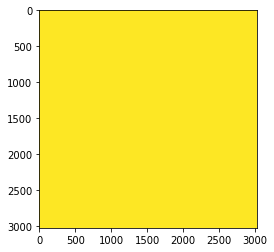

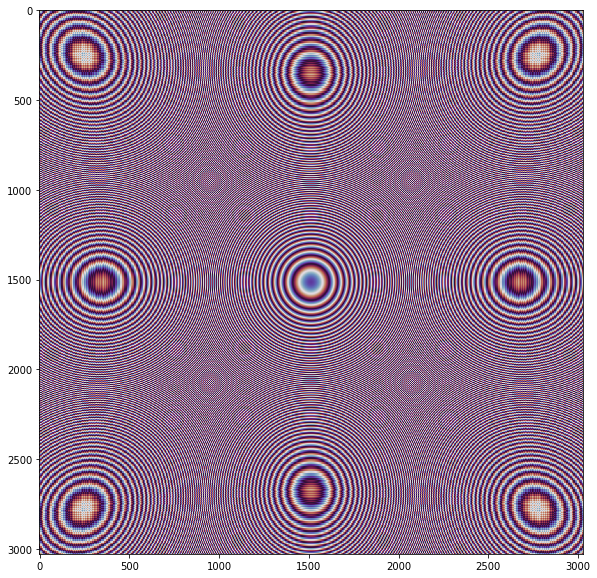

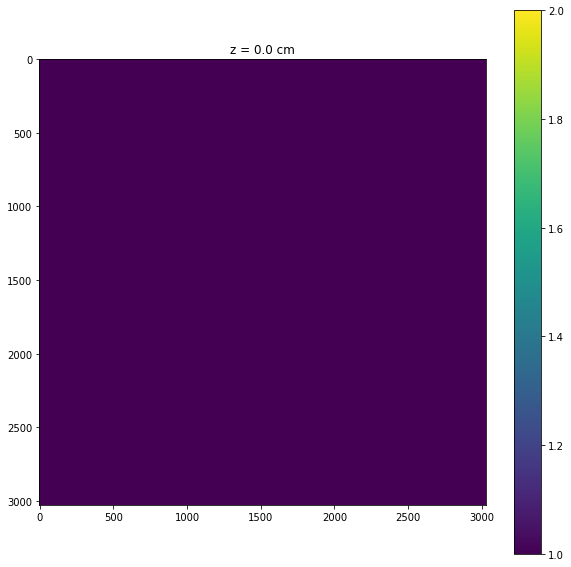

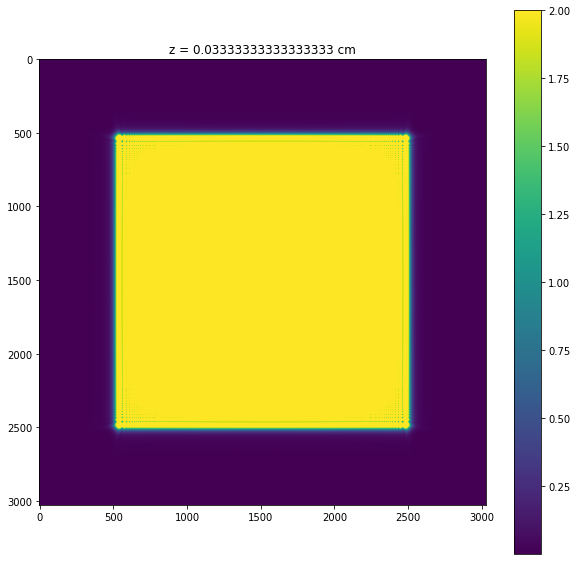

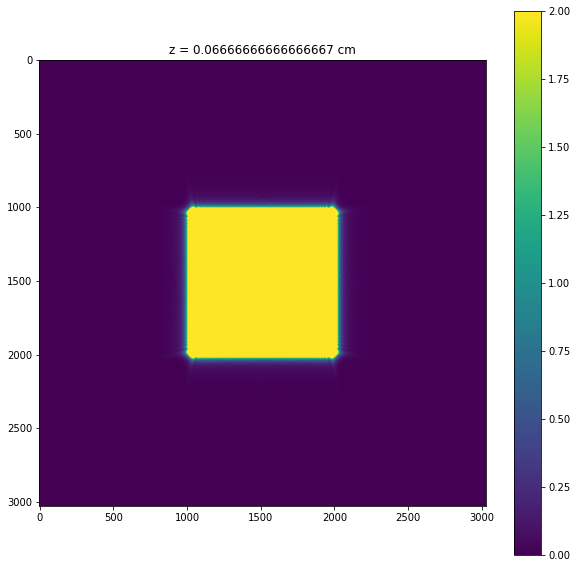

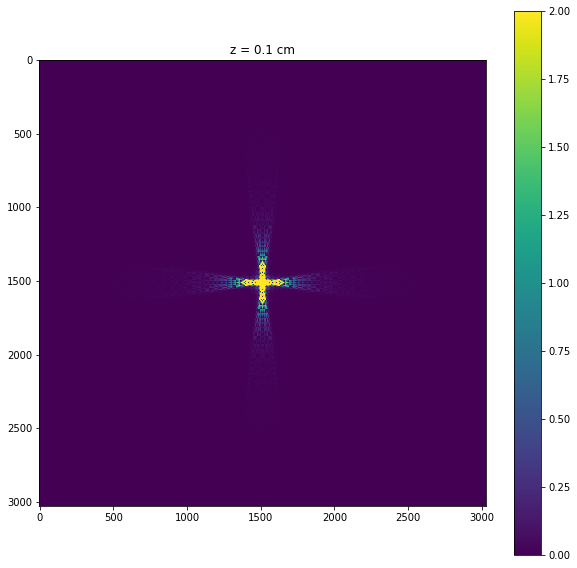

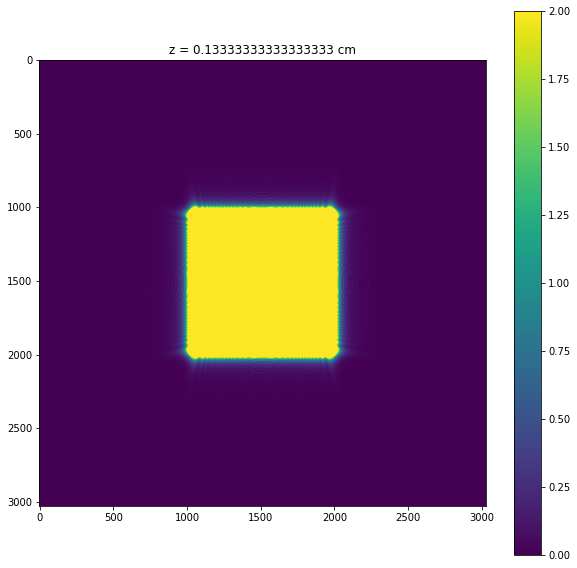

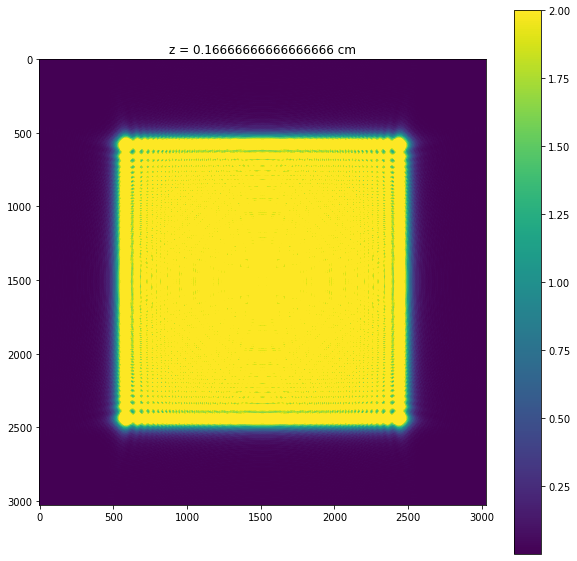

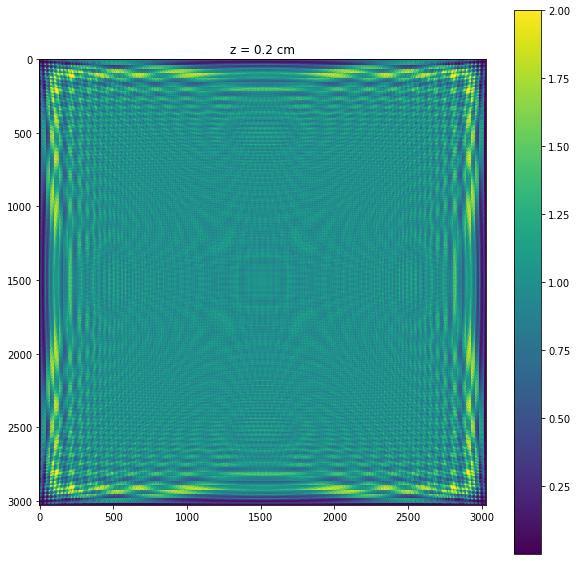

In [145]:
cm = 1e-2
mm = 1e-3
um = 1e-6
nm = 1e-9

lam = 660 * nm # wavelength
r = 500 * um # aperture radius
f = 1 * mm # focal length
D = 0.5 * r

dim = (int(r//lam * 4), int(r//lam * 4))

x = np.linspace(-r, r, dim[0])
y = np.linspace(-r, r, dim[1])
X, Y = np.meshgrid(x, y) 
k = 2 * np.pi / lam # wave number

phase = -k * np.sqrt(X**2 + Y**2 + f**2)
# phase = k * X
# phase = np.ones(dim)
# gaussian = np.exp(-((X**2 + Y**2) / (2 * D**2)))
gaussian = 1
A = gaussian * np.exp(1j * phase)
# A[(X**2 + Y**2) > D**2] = 0

# plt.figure(figsize=(10, 10))
plt.imshow(np.abs(A))
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(np.angle(A), cmap='twilight', interpolation='nearest')
plt.show()

# perform 2d fft
Ak = np.fft.fft2(A)

kx = np.fft.fftfreq(len(x), np.diff(x)[0]) * 2 * np.pi
ky = np.fft.fftfreq(len(y), np.diff(y)[0]) * 2 * np.pi
KX, KY = np.meshgrid(kx, ky)

for z in np.linspace(0, 2 * f, 6 + 1):
    H = np.exp(1j * z * np.emath.sqrt(k**2 - np.abs(KX)**2 - np.abs(KY)**2))
    E = np.fft.ifft2(Ak * H)

    # plot the result
    plt.figure(figsize=(10, 10))
    plt.imshow(np.abs(E)**2, vmax=2, interpolation='nearest')
    plt.colorbar()
    plt.title(f'z = {z / cm} cm')
    plt.show()

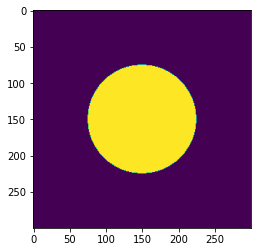

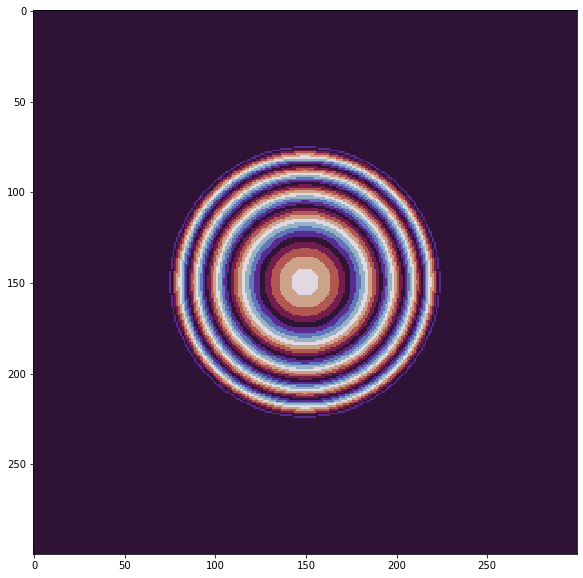

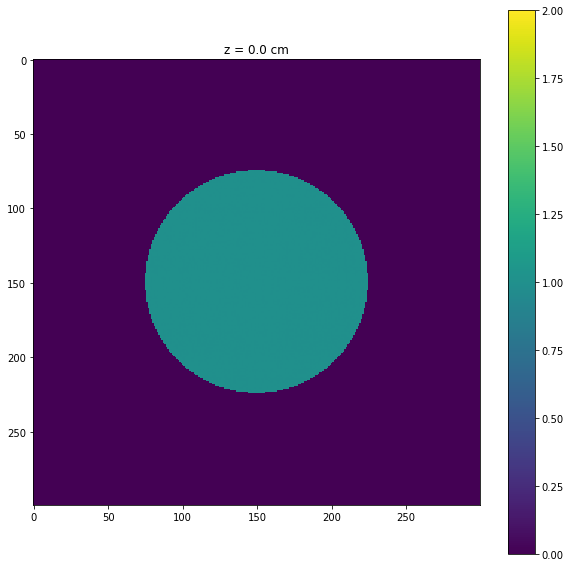

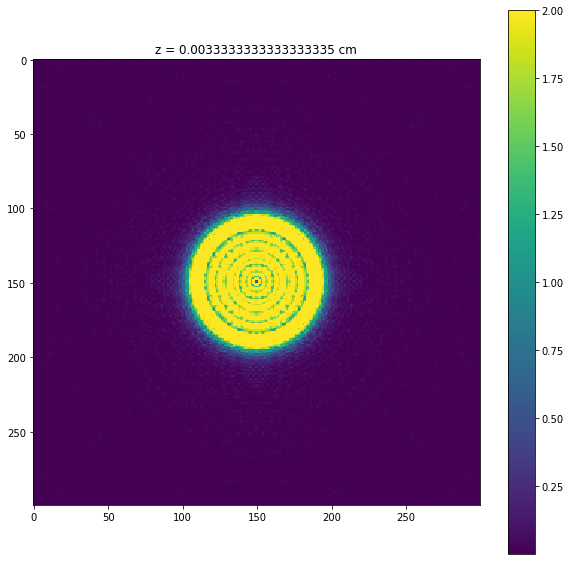

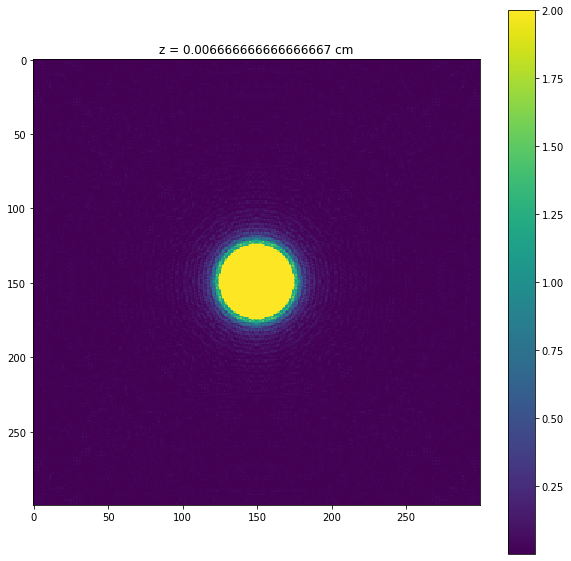

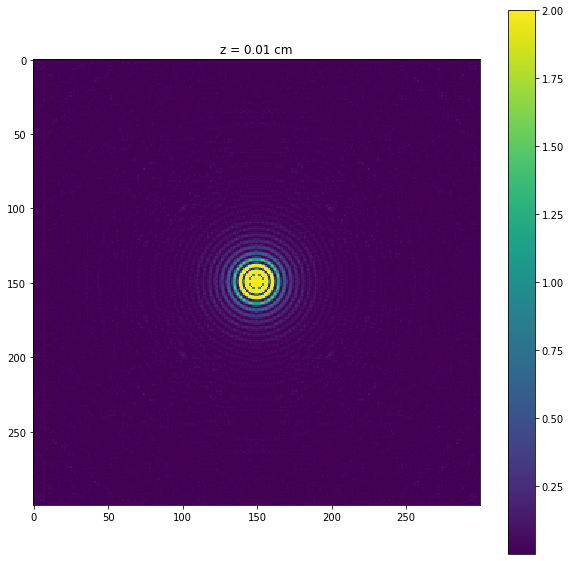

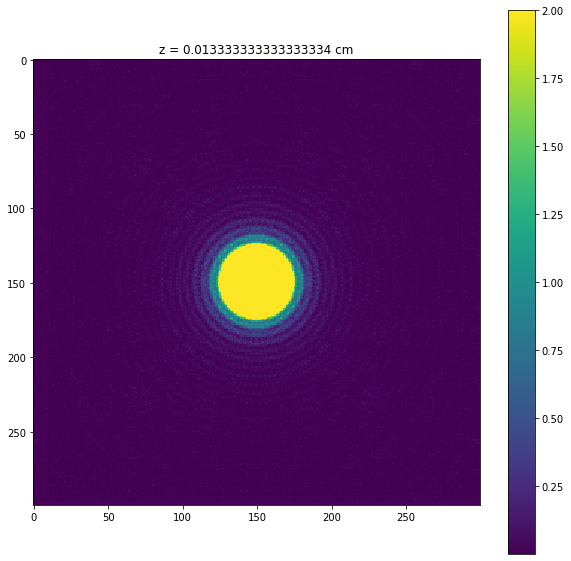

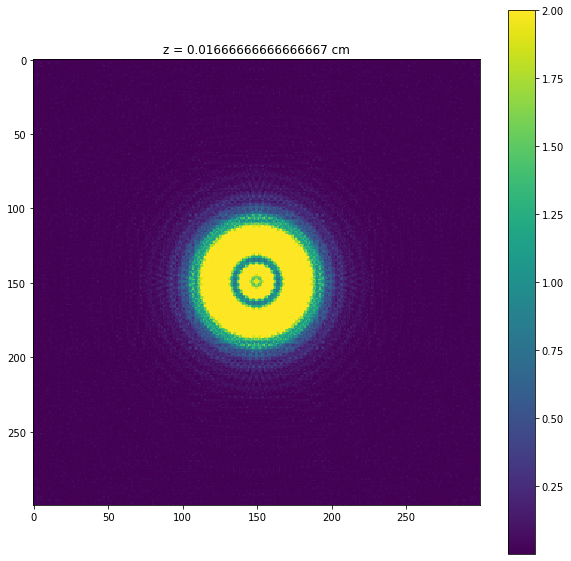

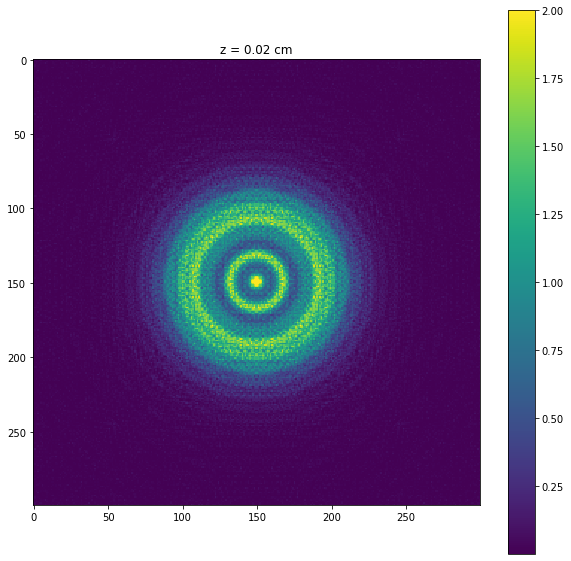

In [147]:
cm = 1e-2
mm = 1e-3
um = 1e-6
nm = 1e-9

lam = 660 * nm # wavelength
r = 50 * um # aperture radius
f = 0.1 * mm # focal length
D = 0.5 * r

dim = (int(r//lam * 4), int(r//lam * 4))

x = np.linspace(-r, r, dim[0])
y = np.linspace(-r, r, dim[1])
X, Y = np.meshgrid(x, y) 
k = 2 * np.pi / lam # wave number

step = 8
# round phase to nearest 2pi/step
round = lambda phase: np.round(phase * step / (2 * np.pi)) * (2 * np.pi / step)

phase = -k * np.sqrt(X**2 + Y**2 + f**2)
phase = round(phase)
# phase = k * X
# phase = np.ones(dim)
# gaussian = np.exp(-((X**2 + Y**2) / (2 * D**2)))
gaussian = 1
A = gaussian * np.exp(1j * phase)
A[(X**2 + Y**2) > D**2] = 0

# plt.figure(figsize=(10, 10))
plt.imshow(np.abs(A))
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(np.angle(A), cmap='twilight', interpolation='nearest')
plt.show()

# perform 2d fft
Ak = np.fft.fft2(A)

kx = np.fft.fftfreq(len(x), np.diff(x)[0]) * 2 * np.pi
ky = np.fft.fftfreq(len(y), np.diff(y)[0]) * 2 * np.pi
KX, KY = np.meshgrid(kx, ky)

for z in np.linspace(0, 2 * f, 6 + 1):
    H = np.exp(1j * z * np.emath.sqrt(k**2 - np.abs(KX)**2 - np.abs(KY)**2))
    E = np.fft.ifft2(Ak * H)

    # plot the result
    plt.figure(figsize=(10, 10))
    plt.imshow(np.abs(E)**2, vmax=2, interpolation='nearest')
    plt.colorbar()
    plt.title(f'z = {z / cm} cm')
    plt.show()

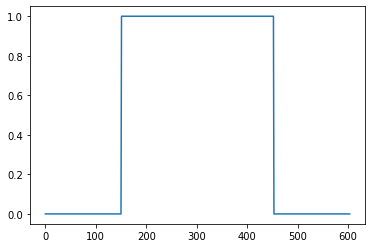

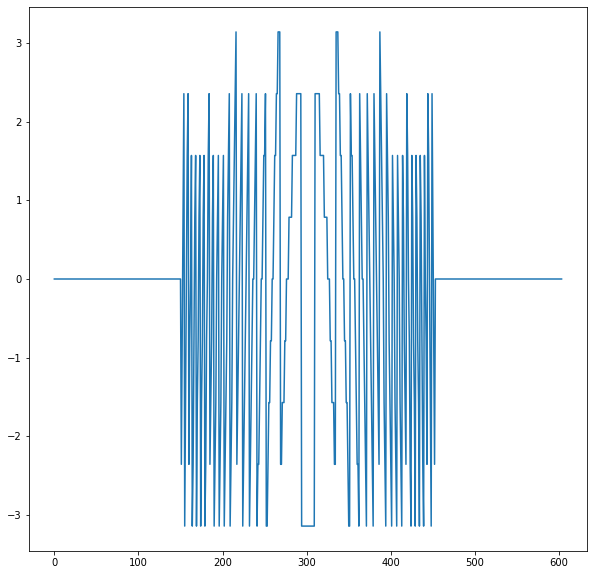

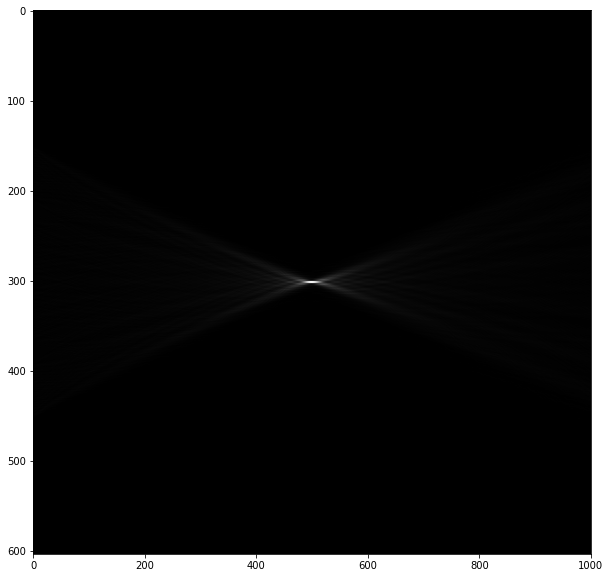

In [148]:
cm = 1e-2
mm = 1e-3
um = 1e-6
nm = 1e-9

lam = 660 * nm # wavelength
r = 100 * um # aperture radius
f = 0.1 * mm # focal length
D = 0.5 * r

dim = (int(r//lam * 4), int(r//lam * 4))

X = np.linspace(-r, r, dim[0])
k = 2 * np.pi / lam # wave number

step = 8
# round phase to nearest 2pi/step
round = lambda phase: np.round(phase * step / (2 * np.pi)) * (2 * np.pi / step)

phase = -k * np.sqrt(X**2 + f**2)
phase = round(phase)
# phase = k * X
# phase = np.ones(dim)
# gaussian = np.exp(-((X**2 + Y**2) / (2 * D**2)))
gaussian = 1
A = gaussian * np.exp(1j * phase)
A[(X**2) > D**2] = 0

# plt.figure(figsize=(10, 10))
plt.plot(np.abs(A))
plt.show()

plt.figure(figsize=(10, 10))
plt.plot(np.angle(A))
plt.show()

Ak = np.fft.fft(A)
KX = np.fft.fftfreq(len(X), np.diff(X)[0]) * 2 * np.pi

intensity = []

for z in np.linspace(0, 2 * f, 1000 + 1):
    H = np.exp(1j * z * np.emath.sqrt(k**2 - np.abs(KX)**2))
    E = np.fft.ifft(Ak * H)

    intensity.append(np.abs(E)**2)


intensity = np.array(intensity).T
#plot the result
plt.figure(figsize=(10, 10))
plt.imshow(intensity, cmap='gray', aspect='auto')
plt.show()
    

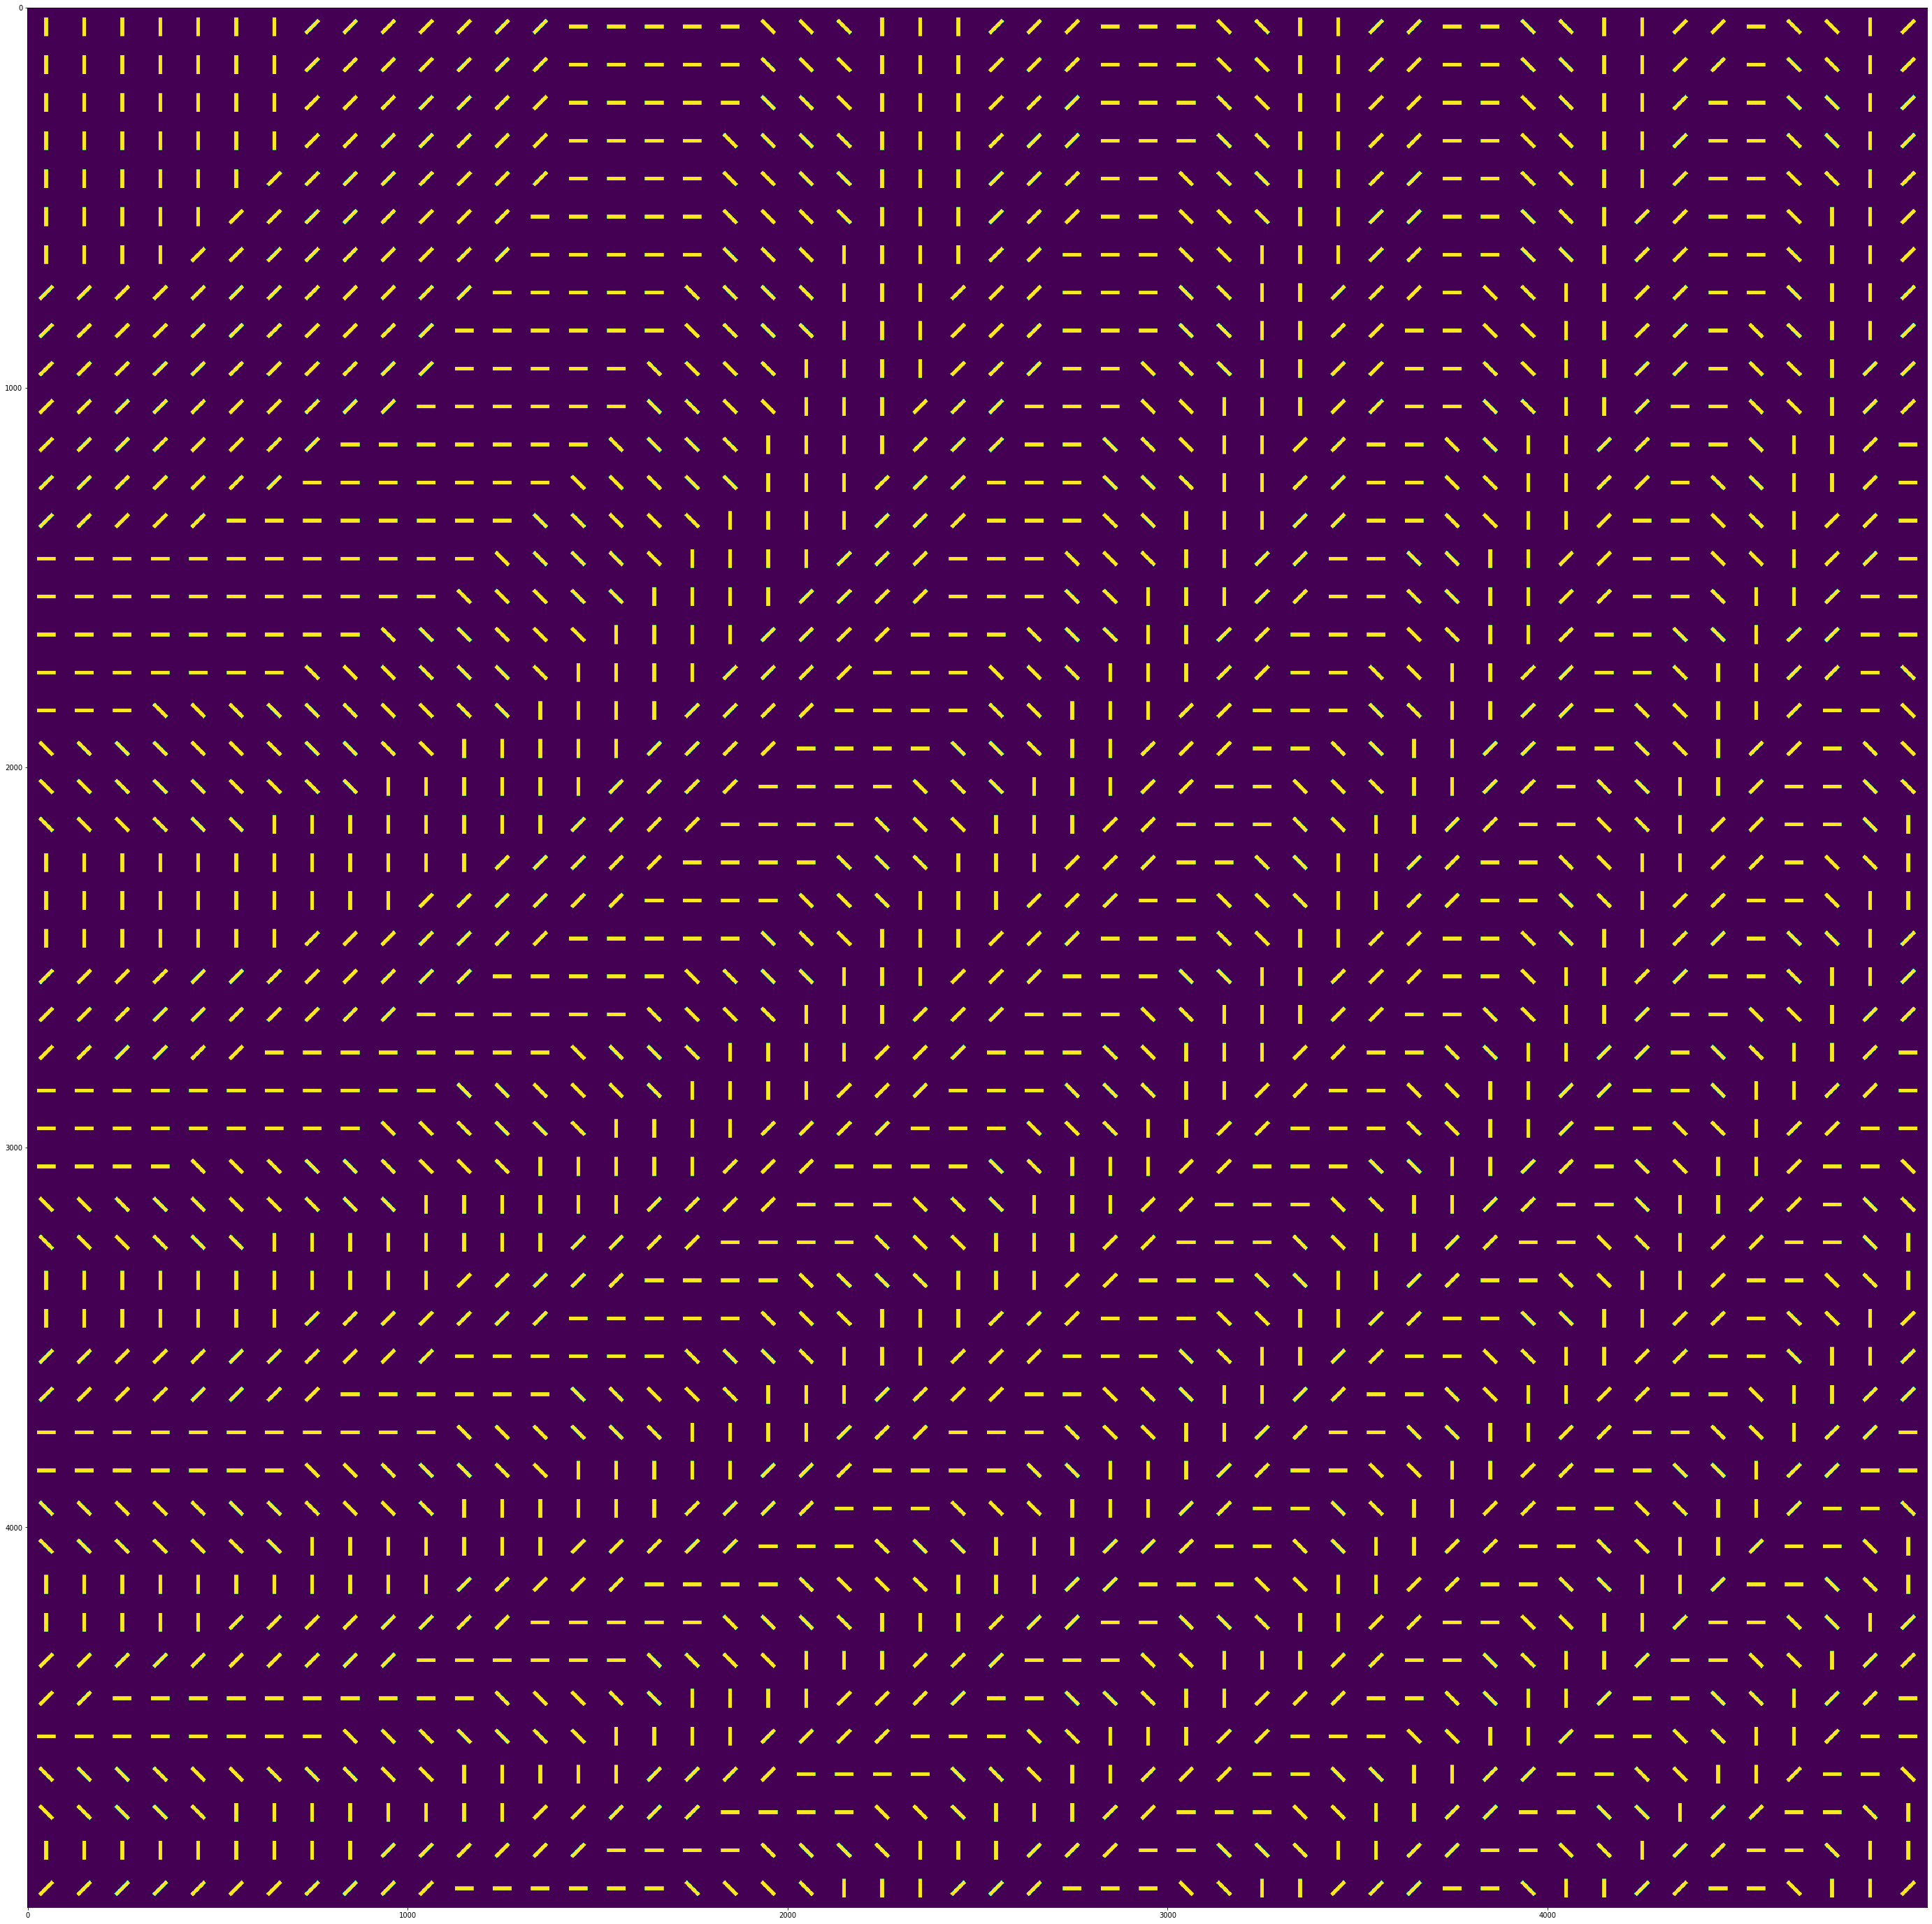

In [144]:
cm = 1e-2
mm = 1e-3
um = 1e-6
nm = 1e-9

lam = 660 * nm # wavelength
r = 50 * um # aperture radius
f = 0.1 * mm # focal length
D = 0.5 * r

dim = (int(r//lam * 4), int(r//lam * 4))

x = np.linspace(-r, r, dim[0])
y = np.linspace(-r, r, dim[1])
X, Y = np.meshgrid(x, y) 
k = 2 * np.pi / lam # wave number

step = 8
# round phase to nearest 2pi/step
round = lambda phase: np.round(phase * step / (2 * np.pi)) * (2 * np.pi / step)

phase = -k * np.sqrt(X**2 + Y**2 + f**2)
phase = round(phase)


from metaimfit import SlotModel

res = (100, 100)
meta_x = np.linspace(-r/dim[0], r/dim[0], res[0], dtype=np.ndarray)
meta_y = np.linspace(-r/dim[1], r/dim[1], res[1], dtype=np.ndarray)
meta_X, meta_Y = np.meshgrid(meta_x, meta_y)

@functools.lru_cache
def slot(t):
    return SlotModel.gaussian_slot(meta_Y, meta_X, cy=0, cx=0, t=pi+t, l=r/dim[0], w=r/dim[1]/5, r=0.001*um)

def make_meta(phase):
    meta = np.zeros(np.multiply(res, phase.shape))
    for i, p in np.ndenumerate(phase):
        meta[i[0]*res[0]:(i[0]+1)*res[0], i[1]*res[1]:(i[1]+1)*res[1]] = slot(p)
    return meta

meta = make_meta(phase[dim[0]//2:dim[0]//2+50, dim[1]//2:dim[1]//2+50])
plt.figure(figsize=(50, 50))
plt.imshow(meta, interpolation='nearest')
plt.show()


In [113]:
x = np.arange(3, dtype=np.float32)
y = np.arange(3, dtype=np.float32)
X, Y = np.meshgrid(x, y)
f = lambda a, t: a + t

xx = np.arange(2, dtype=np.float32)
yy = np.arange(2, dtype=np.float32)
XX, YY = np.meshgrid(xx, yy)
A = XX + YY
B = X + Y

f = np.frompyfunc(f, 2, 1)
# f.outer(B, A)

for a in np.ndenumerate(B):
    print(a)

((0, 0), 0.0)
((0, 1), 1.0)
((0, 2), 2.0)
((1, 0), 1.0)
((1, 1), 2.0)
((1, 2), 3.0)
((2, 0), 2.0)
((2, 1), 3.0)
((2, 2), 4.0)


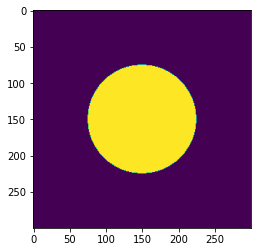

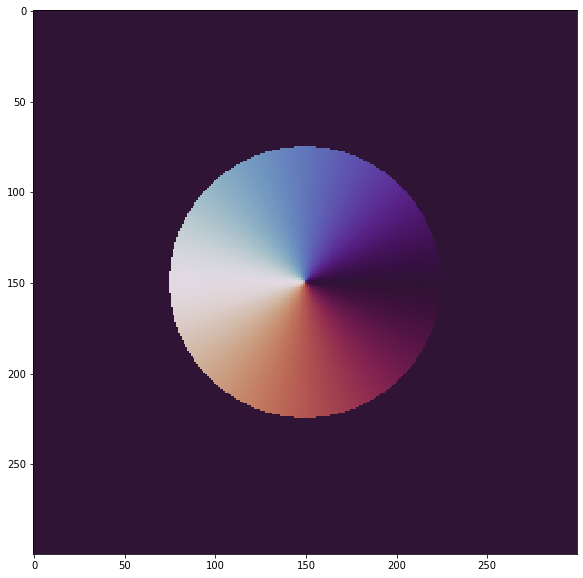

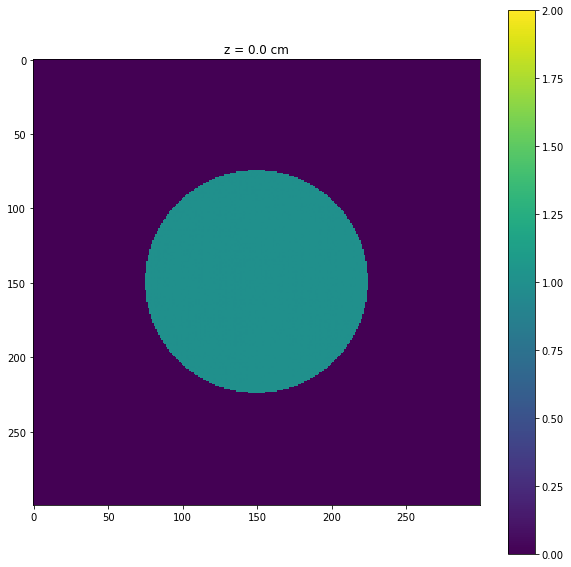

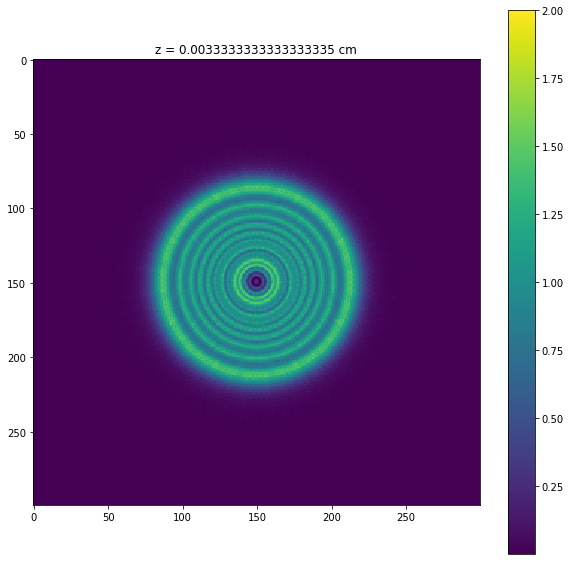

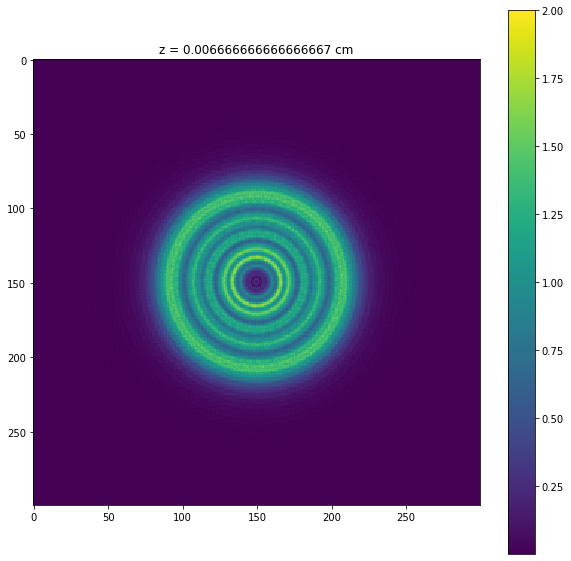

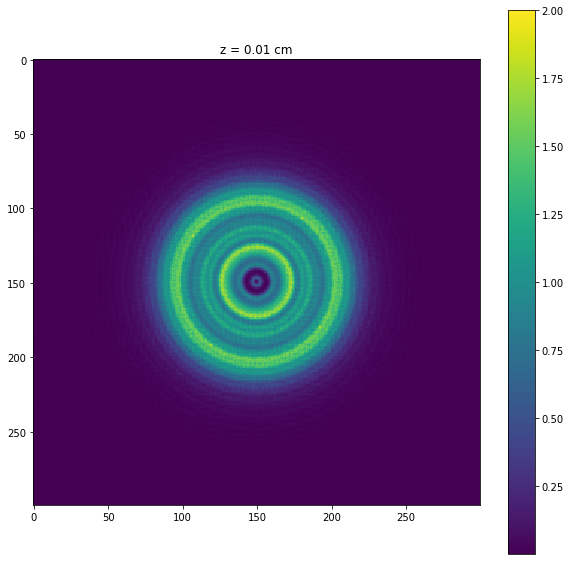

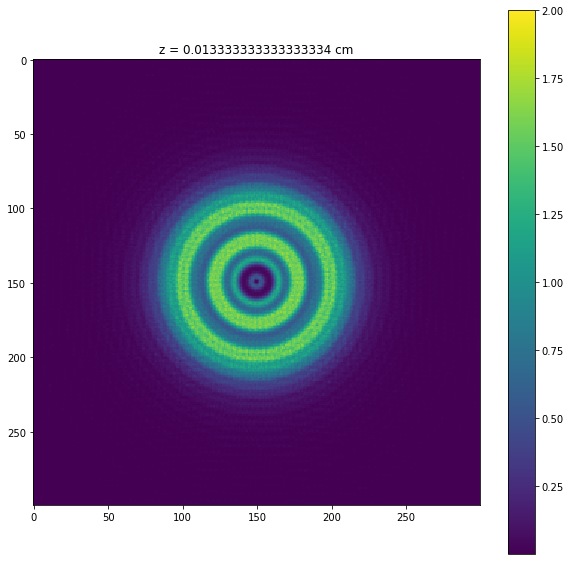

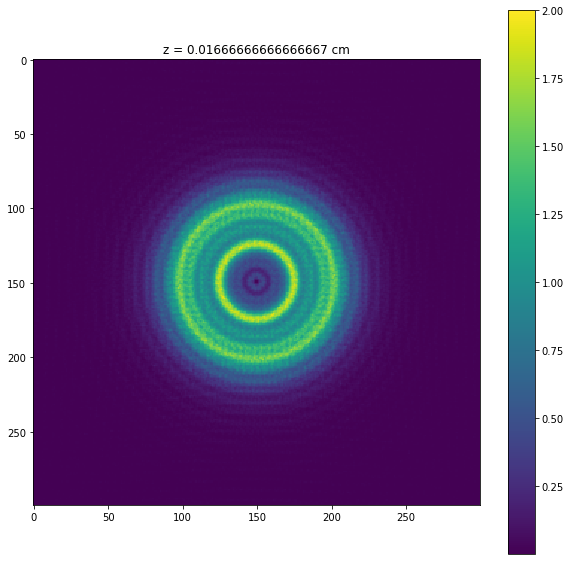

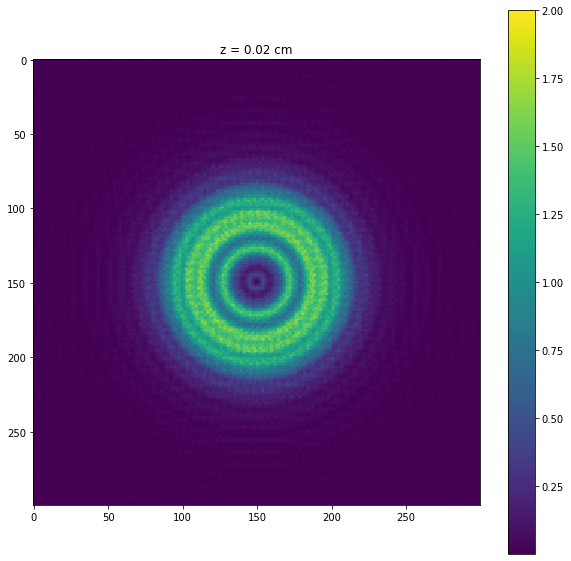

In [150]:
cm = 1e-2
mm = 1e-3
um = 1e-6
nm = 1e-9

lam = 660 * nm # wavelength
r = 50 * um # aperture radius
f = 0.1 * mm # focal length
D = 0.5 * r

dim = (int(r//lam * 4), int(r//lam * 4))

x = np.linspace(-r, r, dim[0])
y = np.linspace(-r, r, dim[1])
X, Y = np.meshgrid(x, y) 
k = 2 * np.pi / lam # wave number

step = 8
# round phase to nearest 2pi/step
round = lambda phase: np.round(phase * step / (2 * np.pi)) * (2 * np.pi / step)

# phase = -k * np.sqrt(X**2 + Y**2 + f**2)
phase = np.arctan2(Y, X)
# phase = round(phase)

# phase = k * X
# phase = np.ones(dim)
# gaussian = np.exp(-((X**2 + Y**2) / (2 * D**2)))
gaussian = 1
A = gaussian * np.exp(1j * phase)
A[(X**2 + Y**2) > D**2] = 0

# plt.figure(figsize=(10, 10))
plt.imshow(np.abs(A))
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(np.angle(A), cmap='twilight', interpolation='nearest')
plt.show()

# perform 2d fft
Ak = np.fft.fft2(A)

kx = np.fft.fftfreq(len(x), np.diff(x)[0]) * 2 * np.pi
ky = np.fft.fftfreq(len(y), np.diff(y)[0]) * 2 * np.pi
KX, KY = np.meshgrid(kx, ky)

for z in np.linspace(0, 2 * f, 6 + 1):
    H = np.exp(1j * z * np.emath.sqrt(k**2 - np.abs(KX)**2 - np.abs(KY)**2))
    E = np.fft.ifft2(Ak * H)

    # plot the result
    plt.figure(figsize=(10, 10))
    plt.imshow(np.abs(E)**2, vmax=2, interpolation='nearest')
    plt.colorbar()
    plt.title(f'z = {z / cm} cm')
    plt.show()